# Data Challenge Project: Fraud Detection  

<img src="https://github.com/er1czz/kaggle/blob/master/unsplash_transaction.JPG?raw=true" align = "right" style = "border:20px solid white">   

<h3> Situation:</h3>  

 * Credit card fraud is a common financial fraud, especially during pandemic. 
 * Shopping everything online is the new norm. 
 
<h3> Task:</h3> 
 
 * How to maximaize the transaction security with minimal hassles to clients?  

<h3> Action:</h3>

* Develop a predicative model based on machine learning algorithms of binary classification.  

<h3> Results:</h3> 

* To maximize the detection rate of fradulent activities while minimizing the number of false alarms (false positive events).    

<b>The project consists of five sections as follows:</b>
1. Data exploration
2. Data cleaning
3. Feature selection
4. Models training and testing
5. Takeaway

<b>Data Wrangling Summary</b>
<p>&nbsp;&nbsp; This project aimed to tackle the data challenge in fraud detection. The original data contain information of transaction and identification. Notably, the data are heavily skewed: 96.5% of transactions is non-fradulent. In addition, the dataset contain missing values and categorical features. To overcome these challenges, undersampling was performed to balance the data; features with missing data were either discarded or replaced by means; all the non-numberical features were systematically transformed into numberical by encoder. To validate model predictivity, original dataset was randomlly splited into two groups: 80% for training and 20% for testing. 

In [1]:
cd ../../../../Desktop/Fraud2/

In [2]:
import pandas as pd

In [3]:
# Data, provided by Kaggle.com, contain two datasets: identity and transaction.  

id = pd.read_csv('train_identity.csv')
tn = pd.read_csv('train_transaction.csv')

## 1. Data exploration

In [4]:
print(id.shape)
print(tn.shape)

(144233, 41)
(590540, 394)


In [5]:
id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
tn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
tn.TransactionID.sum()

1938311430530

In [8]:
id.TransactionID.sum()

466785485555

Feature "TransactionDT" is timedelta from a given reference datetime (not an actual timestamp).

In [9]:
tn.isnull().sum().max()

552913

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 1.1. Remove unpaired transaction (mismatch between identity and transaction datasets)

In [11]:
data = tn.merge(id, on= 'TransactionID', copy = False)

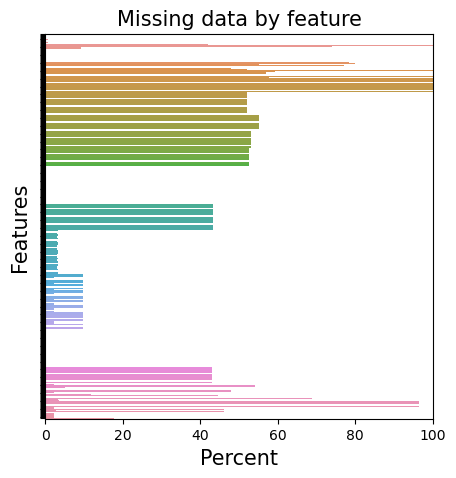

In [12]:
plt.style.use('default')
total=data.isnull().sum()
percent=data.isnull().sum()/data.isnull().count()*100
missing_data=pd.concat([total,percent],axis=1, keys=['total', 'percent'])

plt.subplots(figsize=(5, 5))
g = sns.barplot(y=missing_data.index,x=missing_data['percent'])
g.set(yticklabels=[])

plt.xlim(0, 100)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent', fontsize=15)
plt.title('Missing data by feature', fontsize=15)
plt.show()

In [13]:
print('id rows   %.f' %len(id))
print('tn rows   %.f'   %len(tn))
print('data rows %.f' %len(data))

id rows   144233
tn rows   590540
data rows 144233


In [14]:
tmp = id.size + tn.size - data.size - len(data)
percent = tmp/(id.size + tn.size)*100
print('unmatched data entry %.f' % tmp)
print('unmatched data       %.2f%%\n' % percent)

missing = data.isnull().sum().sum()
total = data.size
percent1 = missing/total*100
print('Missing data entry %.f' % missing)
print('Total data entry   %.f' % total)
print('Missing data:      %.2f%%\n' % percent)

tmp1 = data.isnull().any(axis = 0).sum()
print('Columns with missing values %.f' %tmp1)
print('total columns               %.f' %len(data.columns))

tmp2 = data.isnull().any(axis = 1).sum()
print('Rows with missing values %.f' %tmp2)
print('total rows               %.f' %len(data))

unmatched data entry 175844958
unmatched data       73.70%

Missing data entry 16834880
Total data entry   62597122
Missing data:      73.70%

Columns with missing values 412
total columns               434
Rows with missing values 144233
total rows               144233


# 2. Data cleaning

### Treating missing value is tricky for data pre-processing. 
- Each row has missing value. A few columns have more than 50% data of missing values. Total missing data in percentage is 26.9%.
- Features with over 90% data of missing values will be discarded. For the rest, the missing values will be replaced with mean.
- Considering the potential data leakage, the data jettison will be performed first, splitting data second, and replacing missing values last.

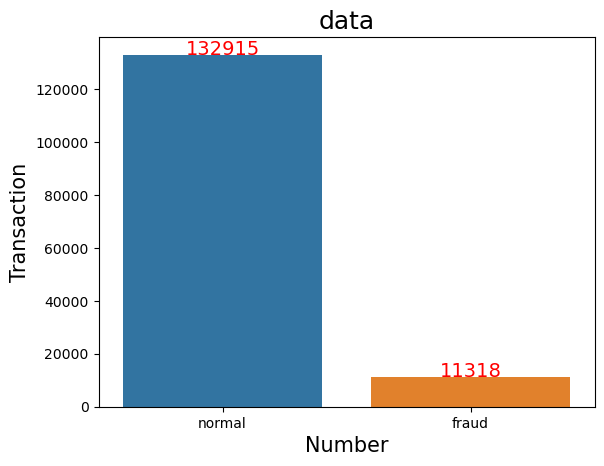

In [15]:
import numpy as np
sns.countplot(x='isFraud',data=data)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('data',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (data['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

### 2.1. Remove columns with over 90% data missing 

In [16]:
data_1 = data.dropna(axis=1, thresh=len(data)*0.1)

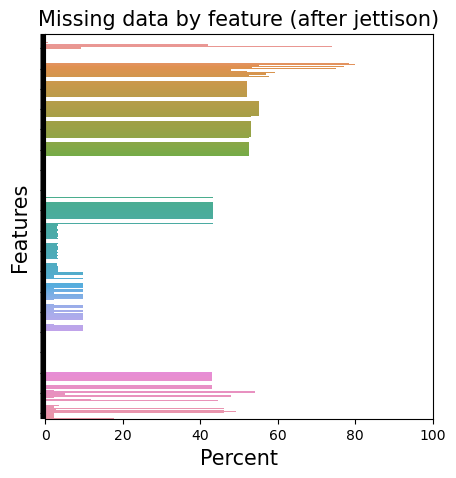

In [17]:
plt.style.use('default')
total1=data_1.isnull().sum()
percent1=data_1.isnull().sum()/data_1.isnull().count()*100
missing_data1=pd.concat([total1,percent1],axis=1, keys=['total', 'percent'])

plt.subplots(figsize=(5, 5))
g = sns.barplot(y=missing_data1.index,x=missing_data1['percent'])
g.set(yticklabels=[])

plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent', fontsize=15)
plt.xlim(0, 100)
plt.title('Missing data by feature (after jettison)', fontsize=15)
plt.show()

In [18]:
tmp = data_1.size/data.size*100
print('Data preserved: %.2f%%\n' % tmp)

Data preserved: 93.09%



### 2.2. Splitting data: 80% for training and 20% for testing

In [19]:
X = data_1.drop('isFraud', axis=1)
y = data_1['isFraud'].copy()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [21]:
tmp = y_test.sum(axis=0)/y.sum(axis=0)*100
print('Testing data: %.1f%%\n' % tmp)

Testing data: 20.5%



In [22]:
y_train.head()

122872    0
54800     0
109241    1
5569      0
1874      0
Name: isFraud, dtype: int64

##### Manually split the dataset for the convenience of data wrangling

In [23]:
normal = data_1[data_1['isFraud'] == 0]
fraud = data_1[data_1['isFraud'] == 1]
# shuffle
normal_r = normal.sample(frac=1)
fraud_r = fraud.sample(frac=1)
# 80% for training and 20% for testing.
normal_1 = normal_r[:106332]
normal_2 = normal_r[106333:]
fraud_1 = fraud_r[:9054]
fraud_2 = fraud_r[9055:]
train = pd.concat([normal_1, fraud_1])
test = pd.concat([normal_2, fraud_2])

### Double check the data features

In [24]:
print(train.shape)
print(test.shape)

(115386, 404)
(28845, 404)


In [25]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
73895,3208062,0,5189232,54.680,C,9026,545.0,185.0,visa,137.0,...,chrome generic,NaN,NaN,NaN,F,F,T,F,desktop,Windows
1609,2994798,0,244102,75.000,R,12501,490.0,150.0,visa,226.0,...,mobile safari 10.0,32.0,1334x750,match_status:1,T,F,F,F,mobile,iOS Device
88651,3285095,0,7353869,24.651,C,12533,555.0,134.0,visa,226.0,...,chrome 63.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
109370,3397563,0,10367292,14.199,C,9633,130.0,185.0,visa,138.0,...,mobile safari generic,NaN,NaN,NaN,F,F,T,F,mobile,NaN
8594,3017627,0,766008,42.151,C,2256,545.0,185.0,visa,226.0,...,chrome 62.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,ALE-L23 Build/HuaweiALE-L23


In [26]:
train[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
73895,visa,chrome generic,desktop,Windows
1609,visa,mobile safari 10.0,mobile,iOS Device
88651,visa,chrome 63.0,desktop,Windows
109370,visa,mobile safari generic,mobile,NaN
8594,visa,chrome 62.0 for android,mobile,ALE-L23 Build/HuaweiALE-L23
...,...,...,...,...
94754,mastercard,chrome 64.0,desktop,Windows
31265,visa,chrome 63.0,desktop,Windows
126459,mastercard,chrome generic,desktop,Windows
143151,mastercard,chrome 65.0,mobile,NaN


### 2.3. Replacing missing value with mean

In [27]:
train_m = train.fillna(train.mean())

In [28]:
train_m.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
73895,3208062,0,5189232,54.680,C,9026,545.0,185.0,visa,137.0,...,chrome generic,26.516063,NaN,NaN,F,F,T,F,desktop,Windows
1609,2994798,0,244102,75.000,R,12501,490.0,150.0,visa,226.0,...,mobile safari 10.0,32.000000,1334x750,match_status:1,T,F,F,F,mobile,iOS Device
88651,3285095,0,7353869,24.651,C,12533,555.0,134.0,visa,226.0,...,chrome 63.0,26.516063,NaN,NaN,F,F,T,F,desktop,Windows
109370,3397563,0,10367292,14.199,C,9633,130.0,185.0,visa,138.0,...,mobile safari generic,26.516063,NaN,NaN,F,F,T,F,mobile,NaN
8594,3017627,0,766008,42.151,C,2256,545.0,185.0,visa,226.0,...,chrome 62.0 for android,26.516063,NaN,NaN,F,F,T,T,mobile,ALE-L23 Build/HuaweiALE-L23


In [29]:
test_m = test.fillna(test.mean())

## 3. Feature Selection

### 3.1. Use encoder: non-numerical value --- > numberical value

In [30]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [31]:
for f in train_m.columns:
    if train_m[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(train_m[f].values))
        train_m[f] = le.transform(list(train_m[f].values))

In [32]:
train_m[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
73895,4,61,0,1520
1609,4,95,1,1645
88651,4,46,0,1520
109370,4,99,1,1660
8594,4,44,1,74
...,...,...,...,...
94754,2,49,0,1520
31265,4,46,0,1520
126459,2,61,0,1520
143151,2,52,1,1660


In [33]:
test[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
122212,discover,chrome 65.0,mobile,NaN
81303,visa,edge 16.0,desktop,Windows
92534,mastercard,chrome 63.0,desktop,NaN
29159,mastercard,chrome 62.0 for android,mobile,SM-G928V Build/NRD90M
118058,mastercard,mobile safari generic,mobile,NaN
...,...,...,...,...
84415,mastercard,chrome 63.0,desktop,Windows
73552,mastercard,chrome 63.0 for android,mobile,SM-N950U Build/NMF26X
111651,visa,chrome 65.0,desktop,NaN
139039,discover,firefox 52.0,desktop,Windows


In [34]:
for f in test_m.columns:
    if test_m[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(test_m[f].values))
        test_m[f] = le.transform(list(test_m[f].values))

In [35]:
test_m[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
122212,1,44,1,1046
81303,4,58,0,962
92534,2,38,0,1046
29159,2,36,1,756
118058,2,86,1,1046
...,...,...,...,...
84415,2,38,0,962
73552,2,39,1,857
111651,4,44,0,1046
139039,1,63,0,962


### 3.2. Correlation

In [36]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
73895,3208062,0,5189232,54.680,C,9026,545.0,185.0,visa,137.0,...,chrome generic,NaN,NaN,NaN,F,F,T,F,desktop,Windows
1609,2994798,0,244102,75.000,R,12501,490.0,150.0,visa,226.0,...,mobile safari 10.0,32.0,1334x750,match_status:1,T,F,F,F,mobile,iOS Device
88651,3285095,0,7353869,24.651,C,12533,555.0,134.0,visa,226.0,...,chrome 63.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
109370,3397563,0,10367292,14.199,C,9633,130.0,185.0,visa,138.0,...,mobile safari generic,NaN,NaN,NaN,F,F,T,F,mobile,NaN
8594,3017627,0,766008,42.151,C,2256,545.0,185.0,visa,226.0,...,chrome 62.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,ALE-L23 Build/HuaweiALE-L23


In [37]:
train_c = train.set_index('TransactionID')

In [38]:
print(train_c.shape)

(115386, 403)


<AxesSubplot:>

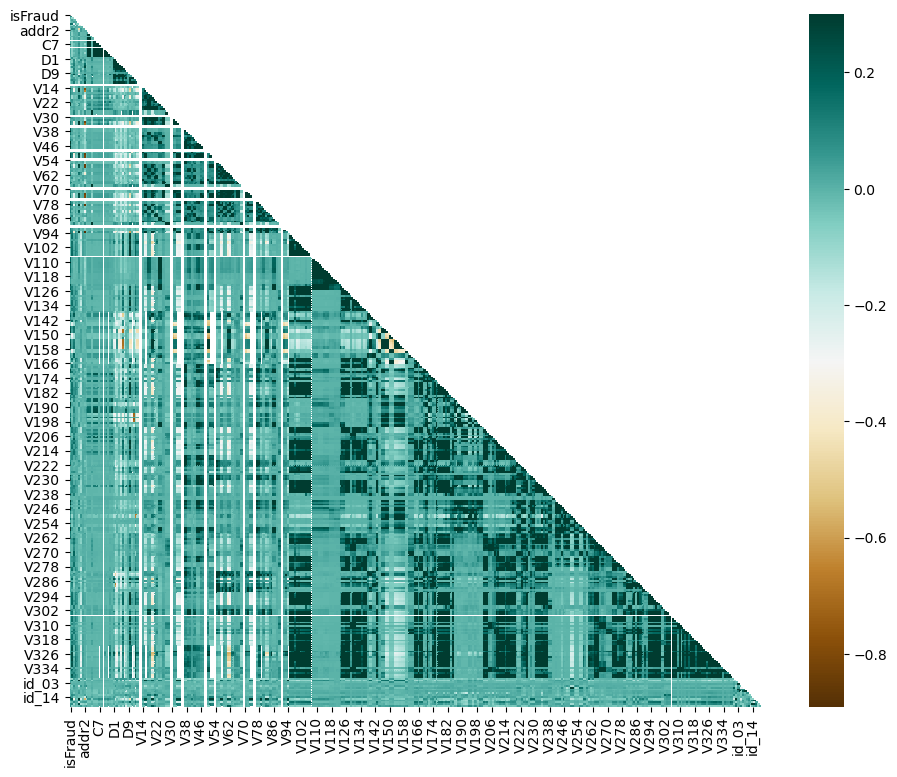

In [39]:
correlation_matrix = train_c.corr()
plt.figure(figsize=(12,9))
matrix = np.triu(train_c.corr())
sns.heatmap(correlation_matrix, mask = matrix, vmax=.3, square=True, cmap= 'BrBG')

- There is no feature exhibiting noticeable correlation with "isFraud".  
- Feature category C, D, and V series show noticeable intercorrelations.

### 3.3. Data balancing (undersample)

#### The training dataset is highly skewed. 
- The fraction of fradulent transactions is a minority, compared to that of normal ones. 
- Thus, accurate correlations between the fraudulent transactions and their corresponding features can be challenging. 
- To overcome this issue, undersampling the majority (normal) is performed which can help to balance the dataset and to improve the computation efficiency.

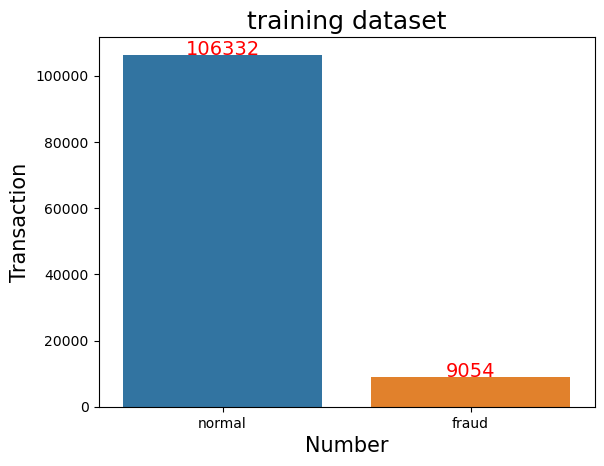

In [40]:
sns.countplot(x='isFraud',data=train_m)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('training dataset',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (train_m['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

In [41]:
normal_m = train_m[train_m['isFraud'] == 0]
fraud_m = train_m[train_m['isFraud'] == 1]

normal_mr = normal_m.sample(frac=1,random_state=13) 
normal_u = normal_mr[:9054]
train_u = pd.concat([normal_u, fraud_m])

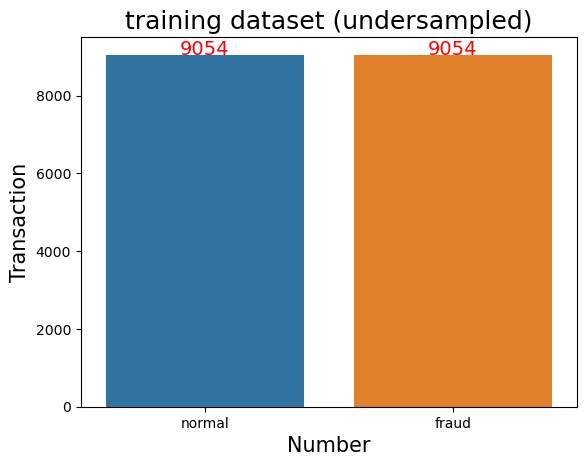

In [42]:
sns.countplot(x='isFraud',data=train_u)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('training dataset (undersampled)',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (train_u['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

### 3.4. Feature Importance (Random Forests)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
X = train_u.drop('isFraud', axis=1)
y = train_u['isFraud'].values

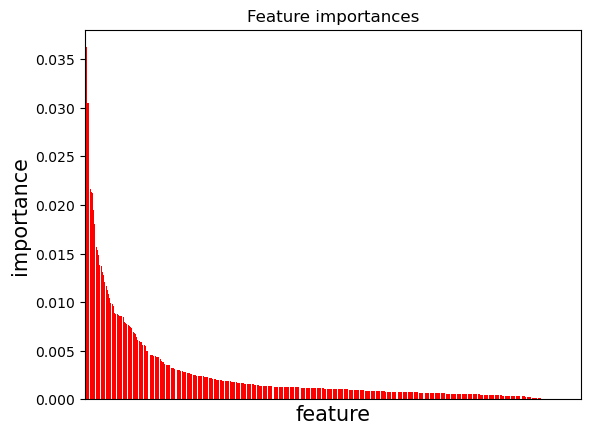

Wall time: 33.3 s


In [86]:
%%time
# define the model
forest = RandomForestClassifier(n_estimators=500, random_state=13)
# fit the model
forest.fit(X, y)
# get importance
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks([])
plt.xlabel('feature', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.xlim([-1, X.shape[1]])
plt.show()

In [118]:
feature = [ ]
# summarize feature importance
for i,v in enumerate(importances):
    if v >= 0.002:
        print('Feature: %0d, Score: %.5f' % (i,v))
        feature.append(i)

Feature: 0, Score: 0.02118
Feature: 1, Score: 0.02133
Feature: 2, Score: 0.01572
Feature: 3, Score: 0.00307
Feature: 4, Score: 0.01376
Feature: 5, Score: 0.01164
Feature: 6, Score: 0.00593
Feature: 7, Score: 0.00321
Feature: 8, Score: 0.00745
Feature: 9, Score: 0.00551
Feature: 10, Score: 0.00458
Feature: 12, Score: 0.00459
Feature: 13, Score: 0.00886
Feature: 14, Score: 0.00964
Feature: 15, Score: 0.03619
Feature: 16, Score: 0.02164
Feature: 18, Score: 0.00862
Feature: 20, Score: 0.01307
Feature: 21, Score: 0.00792
Feature: 22, Score: 0.00867
Feature: 24, Score: 0.00696
Feature: 25, Score: 0.01950
Feature: 26, Score: 0.00755
Feature: 27, Score: 0.03043
Feature: 28, Score: 0.03046
Feature: 29, Score: 0.00443
Feature: 30, Score: 0.00434
Feature: 32, Score: 0.00302
Feature: 34, Score: 0.00369
Feature: 36, Score: 0.00874
Feature: 37, Score: 0.00497
Feature: 39, Score: 0.00297
Feature: 41, Score: 0.00286
Feature: 42, Score: 0.00255
Feature: 76, Score: 0.00847
Feature: 77, Score: 0.01084
Fe

## 4. Model training and testing

In [47]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn import metrics

In [119]:
X_train = train_u.drop('isFraud', axis=1)
X_train = X_train.iloc[:,feature]
X_test = test_m.drop('isFraud', axis=1)
X_test = X_test.iloc[:,feature]
y_train = train_u['isFraud'].values
y_test = test_m['isFraud'].values

In [120]:
%%time
# Logistic
LR = LogisticRegression(random_state=13,n_jobs=8)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

Wall time: 3.55 s


In [121]:
%%time
# XGBoost
XG = xgb.XGBClassifier(n_estimators=500, max_depth=5,random_state=13,n_jobs=8)
XG.fit(X_train, y_train)
XG_pred = XG.predict(X_test)

Wall time: 12.4 s


In [122]:
%%time
# Random Forest
RF = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=13, n_jobs=8)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

Wall time: 2.06 s


In [123]:
%%time
# LightGBM
LG = lgb.LGBMClassifier(n_estimator=500, max_depth=5, random_state = 13, n_jobs=8)
LG.fit(X_train, y_train)
LG_pred = LG.predict(X_test)

Wall time: 644 ms


#### F<sub>1</sub> score

In [124]:
score1 = metrics.f1_score(y_test, LR_pred)
score2 = metrics.f1_score(y_test, XG_pred)
score3 = metrics.f1_score(y_test, RF_pred)
score4 = metrics.f1_score(y_test, LG_pred)
print ('F1 score Logistic:     %.5f' % score1 )
print ('F1 score XGboost:      %.5f' % score2 )
print ('F1 score RandomForest: %.5f' % score3 )
print ('F1 score LightGBM:     %.5f' % score4 )

F1 score Logistic:     0.20648
F1 score XGboost:      0.67234
F1 score RandomForest: 0.48559
F1 score LightGBM:     0.60390


#### Confusion matrix

In [125]:
cm1 = metrics.confusion_matrix(y_test, LR_pred)
cm2 = metrics.confusion_matrix(y_test, XG_pred)
cm3 = metrics.confusion_matrix(y_test, RF_pred)
cm4 = metrics.confusion_matrix(y_test, LG_pred)

Text(0.5, 1.0, 'LightGBM')

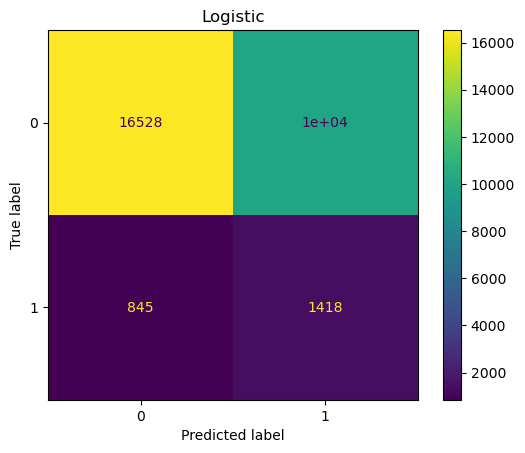

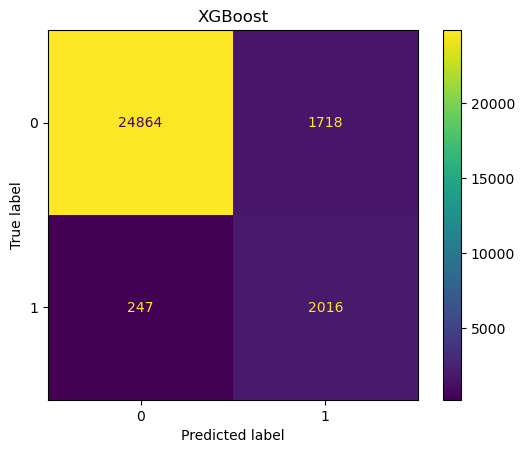

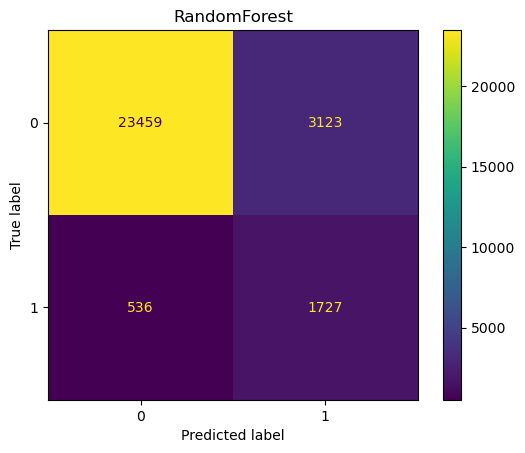

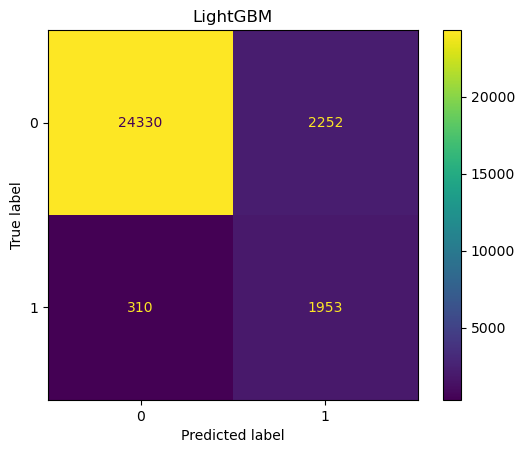

In [126]:
cm1_display = metrics.ConfusionMatrixDisplay(cm1).plot()
cm1_display.ax_.set_title('Logistic')
cm2_display = metrics.ConfusionMatrixDisplay(cm2).plot()
cm2_display.ax_.set_title('XGBoost')
cm3_display = metrics.ConfusionMatrixDisplay(cm3).plot()
cm3_display.ax_.set_title('RandomForest')
cm4_display = metrics.ConfusionMatrixDisplay(cm4).plot()
cm4_display.ax_.set_title('LightGBM')

#### Precision-Recall Area Under Curve 

In [127]:
from sklearn.metrics import plot_precision_recall_curve

Text(0.5, 1.0, 'LightGBM')

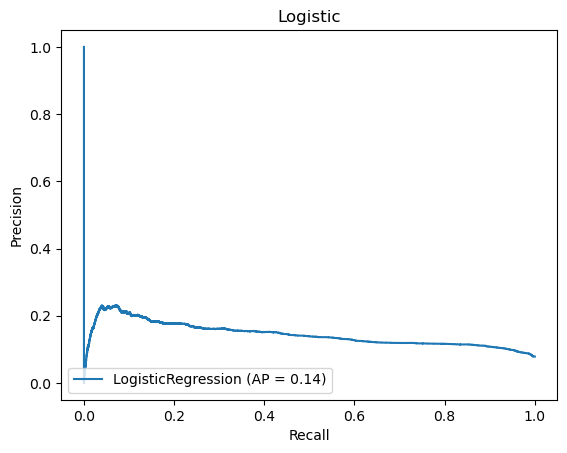

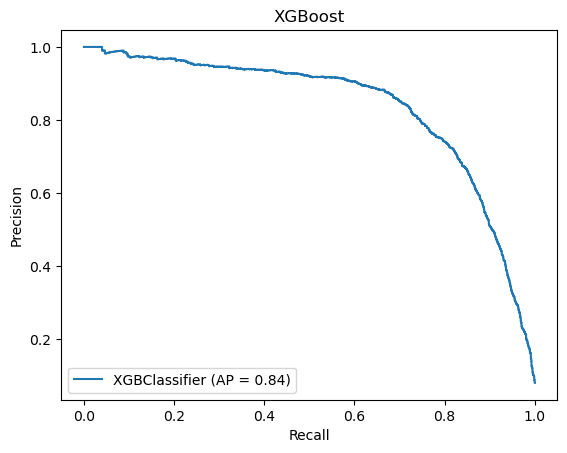

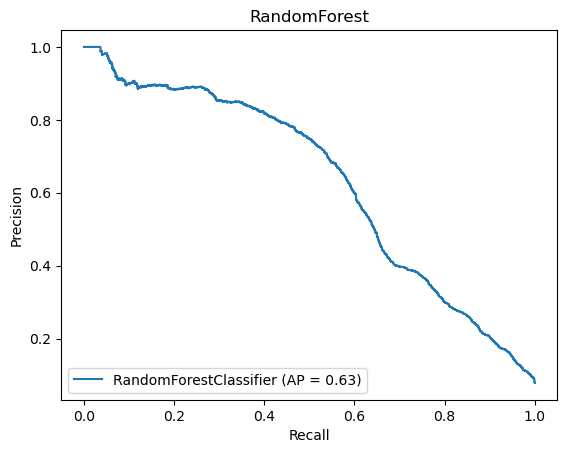

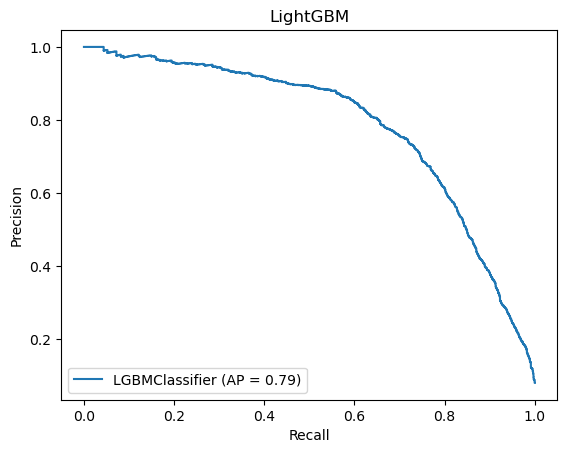

In [128]:
disp1 = plot_precision_recall_curve(LR, X_test, y_test)
disp1.ax_.set_title('Logistic')
disp2 = plot_precision_recall_curve(XG, X_test, y_test)
disp2.ax_.set_title('XGBoost')
disp3 = plot_precision_recall_curve(RF, X_test, y_test)
disp3.ax_.set_title('RandomForest')
disp4 = plot_precision_recall_curve(LG, X_test, y_test)
disp4.ax_.set_title('LightGBM')

## 5. Takeway

- Machine learning models have potential to provide high accuracy fraud detection, especially by using the XGBoost algorithm.
- The XGBoost model is comparable to the LightGBM in terms of precision and recall.
- High precision leads to high fraud detection rate.
- High recall improves the user experience.

### Future tasks
1. Model optimization
2. Learning curve
3. Data normalization

### References  
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html  
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets  
https://www.kaggle.com/pavansanagapati/anomaly-detection-credit-card-fraud-analysis  
https://www.kaggle.com/shahules/tackling-class-imbalance  
https://scikit-learn.org/   
https://en.wikipedia.org/wiki/F1_score

Image source  
https://images.unsplash.com/photo-1563013544-824ae1b704d3